In [1]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
#import packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228827136/228813984 [==============================] - 33s 0us/step


In [4]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [5]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [6]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [7]:
batch_size = 100
IMG_SHAPE = 150

In [8]:
image_gen = ImageDataGenerator(rescale= 1./255, horizontal_flip= True)

train_data_gen = image_gen.flow_from_directory( batch_size = batch_size , directory= train_dir, target_size = (IMG_SHAPE,IMG_SHAPE), shuffle = True)

Found 2935 images belonging to 5 classes.


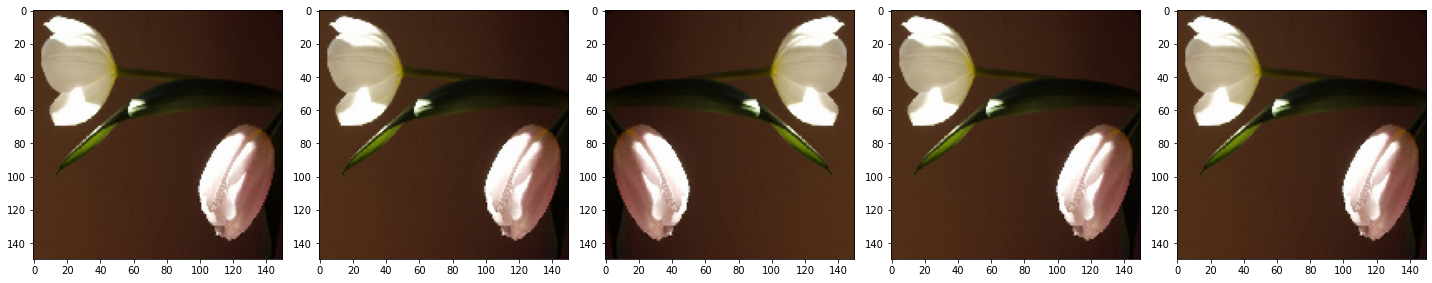

In [9]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [10]:
image_gen = ImageDataGenerator(rescale= 1./255, rotation_range= 45 )

train_data_gen = image_gen.flow_from_directory(batch_size= batch_size , directory = train_dir, target_size = (IMG_SHAPE,IMG_SHAPE), shuffle = True)

Found 2935 images belonging to 5 classes.


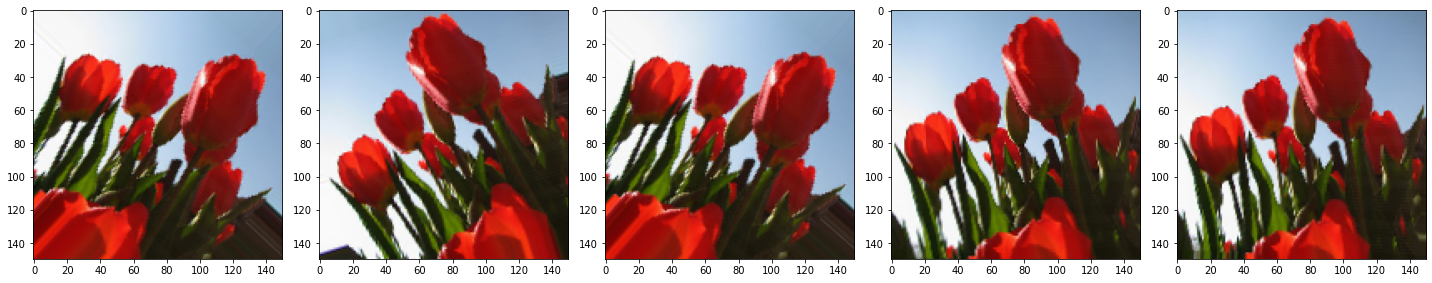

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
mage_gen = ImageDataGenerator(rescale= 1./255, zoom_range=0.5 )

train_data_gen = image_gen.flow_from_directory(batch_size= batch_size , directory = train_dir, target_size = (IMG_SHAPE,IMG_SHAPE), shuffle = True)

Found 2935 images belonging to 5 classes.


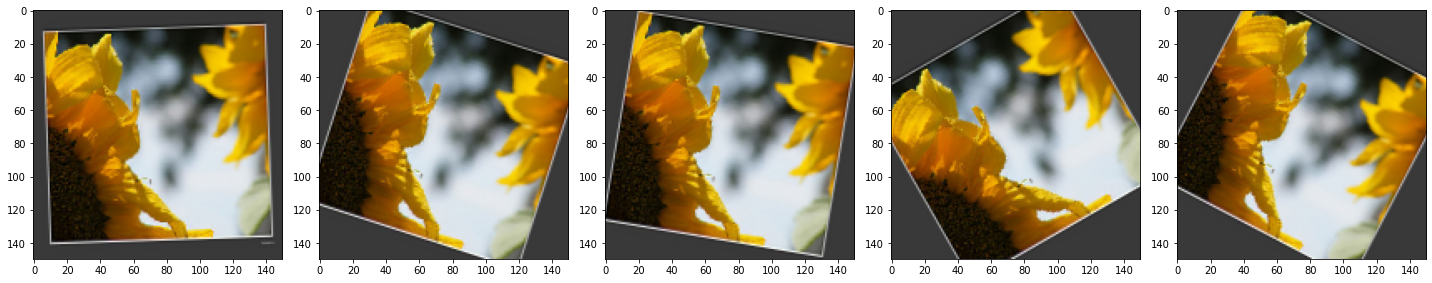

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')

Found 2935 images belonging to 5 classes.


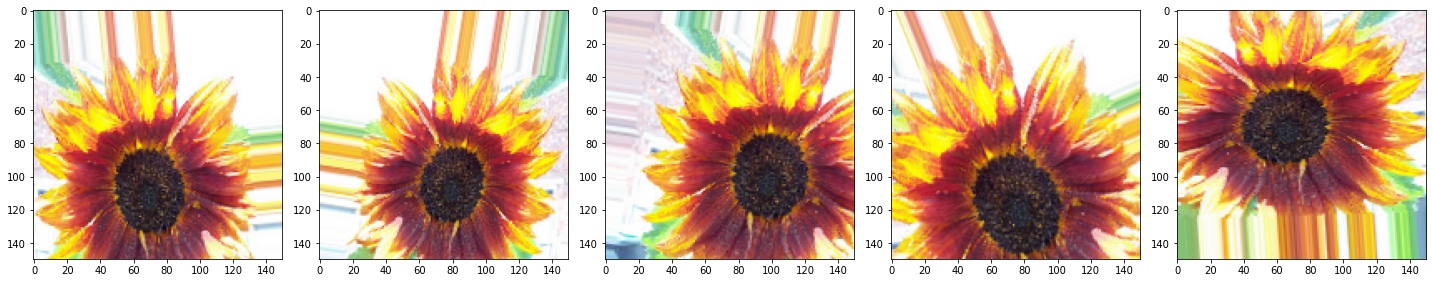

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


In [17]:
model = tf.keras.Sequential([
       tf.keras.layers.Conv2D(16, 3 ,padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)),
       tf.keras.layers.MaxPool2D(pool_size= (2,2)),

       tf.keras.layers.Conv2D(32, 3 ,padding='same', activation='relu'),
       tf.keras.layers.MaxPool2D(pool_size= (2,2)),

       tf.keras.layers.Conv2D(64,3 ,padding='same', activation='relu'),
       tf.keras.layers.MaxPool2D(pool_size=(2,2)),
       
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(512, activation = 'relu' ),
       tf.keras.layers.Dense(5, activation ='softmax')

                          ])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
epochs = 1 #80

history = model.fit_generator(
    train_data_gen,
    #train and val steps fehlen noch
    epochs=epochs,
    validation_data=val_data_gen
 
)

C:\Users\Jeremy\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys
C:\Users\Jeremy\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


30/30 [==============================] - 36s 1s/step - loss: 1.6301 - accuracy: 0.3227 - val_loss: 1.3655 - val_accuracy: 0.3905


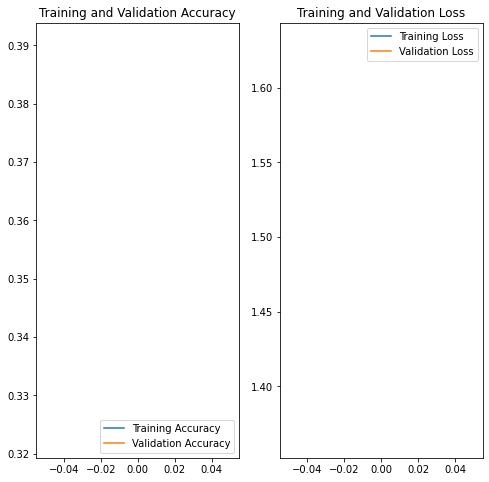

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()